In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Загрузим датасет Титаник
=====

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
y = pd.read_csv('titanic/gender_submission.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
y = y.drop(['PassengerId'], axis=1)
df = pd.concat([test,y], axis=1)

In [6]:
df_titanic = pd.concat([df, train], axis=0)
df_titanic.shape

(1309, 12)

In [7]:
df_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [8]:
df_titanic['sex_num'] = [1 if x == 'male' else 0 for x in df_titanic['Sex']]
df_titanic['embarked_num'] = [1 if x == 'S' else(2 if x == 'Q' else 0) for x in df_titanic['Embarked']]
df_titanic = df_titanic.drop(['Sex','Embarked','Name','Ticket'], axis=1)
df_titanic = df_titanic.fillna(0)

In [9]:
y = df_titanic[['Survived']]
y.shape

(1309, 1)

In [10]:
Xcut = df_titanic[['Pclass', 'sex_num', 'Age', 'SibSp', 'Parch',
        'Fare', 'embarked_num']]
Xcut.shape

(1309, 7)

Задание 2: AML-4
=====
Взять датасет titanic (прошлое задание)
Обучить на нем 3 модели классификации - логистическую регрессию, дерево решений и алгоритм knn
Построить график сравнения roc-кривых моделей на тестовой выборки
Вывести ROC AUC SCORE для каждой из моделей

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Xcut, y, test_size=0.3)

DecisionTreeClassifier

In [26]:
model_tree = DecisionTreeClassifier(max_depth=5)

In [31]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

LogisticRegression

In [32]:
model_lg = LogisticRegression()

In [33]:
model_lg.fit(X_train, y_train)

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

KNeighborsClassifier

In [34]:
model_knn = KNeighborsClassifier( n_neighbors = 3 )

In [36]:
model_knn.fit(X_train, y_train)

/Users/andreysemeshin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(n_neighbors=3)

Строим график roc-кривых для моделей
======

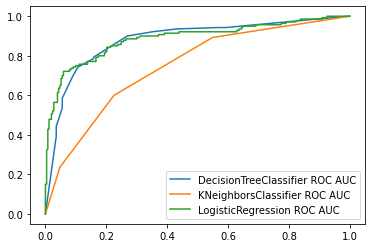

____________________
For KNN roc_auc_score is 0.75
For Tree roc_auc_score is 0.88
For LogReg roc_auc_score is 0.89


In [40]:
fpr_lg, tpr_lg, _lg = metrics.roc_curve(y_test,  model_lg.predict_proba(X_test)[: ,1])
fpr_knn, tpr_knn, _knn = metrics.roc_curve(y_test,  model_knn.predict_proba(X_test)[: ,1])
fpr_tree, tpr_tree, _tree = metrics.roc_curve(y_test,  model_tree.predict_proba(X_test)[: ,1])

plt.plot(fpr_tree,tpr_tree,label="DecisionTreeClassifier ROC AUC")
plt.plot(fpr_knn,tpr_knn,label="KNeighborsClassifier ROC AUC")
plt.plot(fpr_lg,tpr_lg,label="LogisticRegression ROC AUC")

plt.legend(loc=4)
plt.show()

print('_'*20)
print('For KNN roc_auc_score is {:.2f}'.format(metrics.roc_auc_score(y_test,  model_knn.predict_proba(X_test)[: ,1])))
print('For Tree roc_auc_score is {:.2f}'.format(metrics.roc_auc_score(y_test,  model_tree.predict_proba(X_test)[: ,1])))
print('For LogReg roc_auc_score is {:.2f}'.format(metrics.roc_auc_score(y_test,  model_lg.predict_proba(X_test)[: ,1])))